In [19]:
from tensorflow.keras.datasets import reuters


(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(f"Training data shape: {train_data.shape}")

Training data shape: (8982,)


In [20]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.0
    return results

In [21]:
train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)
print(f"Vectorized training data shape: {train_data.shape}")

Vectorized training data shape: (8982, 10000)


In [22]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.0
    return results

train_labels = to_one_hot(train_labels)
test_labels = to_one_hot(test_labels)
print(f"One-hot encoded training labels shape: {train_labels.shape}")

One-hot encoded training labels shape: (8982, 46)


In [23]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10000,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
x_train = train_data[:8000]
x_val = train_data[8000:]
y_train = train_labels[:8000]
y_val = train_labels[8000:]

In [25]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.3706 - loss: 3.2491 - val_accuracy: 0.6039 - val_loss: 1.9533
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.6550 - loss: 1.6792 - val_accuracy: 0.6792 - val_loss: 1.4926
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.7315 - loss: 1.2603 - val_accuracy: 0.7291 - val_loss: 1.2933
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.7917 - loss: 1.0011 - val_accuracy: 0.7434 - val_loss: 1.1802
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.8189 - loss: 0.8421 - val_accuracy: 0.7607 - val_loss: 1.1108
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.8503 - loss: 0.6865 - val_accuracy: 0.7770 - val_loss: 1.0485
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8823 - loss: 0.5438 - val_accuracy: 0.7719 - val_loss: 1.0427
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8962 - loss: 0.4933 - val_accuracy: 0.7821 

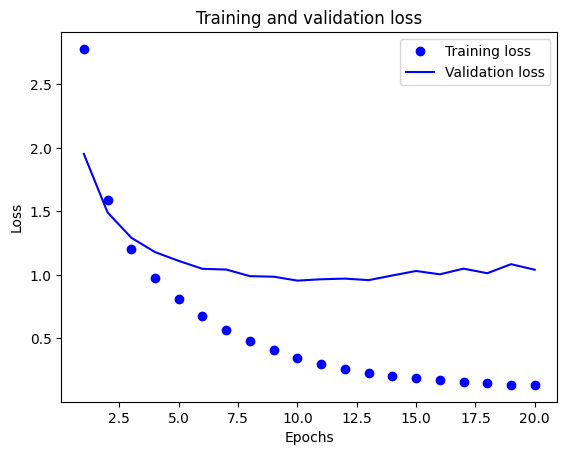

In [26]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


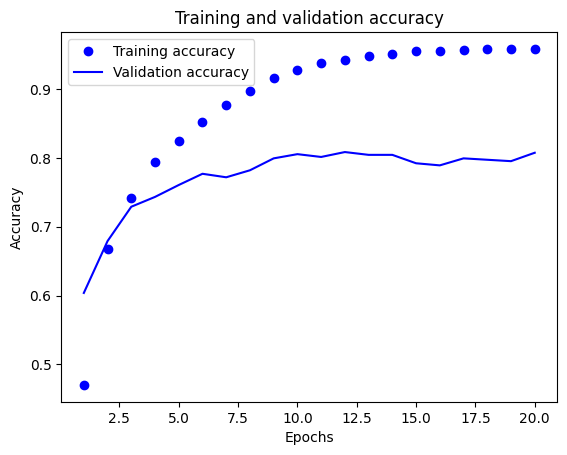

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
retults = model.evaluate(test_data, test_labels)
print(f"Test loss: {retults[0]}")
print(f"Test accuracy: {retults[1]}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7977 - loss: 0.9909
Test loss: 1.0128347873687744
Test accuracy: 0.7920747995376587


##### 随机分类器精度

In [33]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print(f"Random baseline accuracy: {hits_array.mean()}")

Random baseline accuracy: 0.9650199388284486


In [35]:
predictions = model.predict(test_data)
print(f"Predictions for first test sample: {predictions[0]}")
print(f"Sum of probabilities for first test sample: {np.sum(predictions[0])}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Predictions for first test sample: [2.0631433e-06 2.6056089e-06 1.4469828e-07 9.3623632e-01 6.2056903e-02
 9.9141239e-08 1.9984620e-06 6.7784508e-06 1.4563506e-03 6.7465216e-08
 4.9324342e-08 3.0899287e-06 9.8283499e-07 2.6114860e-05 3.7464772e-06
 1.4400034e-07 4.8335216e-05 1.0942250e-05 1.6206072e-07 6.4981876e-05
 5.0628696e-05 1.5456607e-06 4.2322654e-08 8.7293188e-07 1.5170134e-09
 2.8876441e-06 9.6232760e-08 1.2735665e-06 4.3109659e-07 1.9248682e-06
 1.4840380e-06 5.0674554e-08 1.0585105e-06 4.6675844e-08 7.7041847e-07
 3.7958774e-08 4.3099362e-06 1.5674431e-06 1.5634942e-06 7.1287577e-06
 1.1590057e-07 2.9650997e-07 1.2022047e-10 1.6372431e-07 1.0960327e-09
 1.6023955e-09]
Sum of probabilities for first test sample: 1.0000001192092896


In [36]:
predictions[0].shape

(46,)

In [37]:
np.sum(predictions[0])

np.float32(1.0000001)